In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
movies=pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
movies.isnull().sum()

,0
movieId,0
title,0
genres,0


In [ ]:
 movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [ ]:
ratings=pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060019 entries, 0 to 7060018
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 215.5 MB


In [ ]:
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,7.060019e+06,7.060019e+06,7.060019e+06,7.060019e+06
mean,2.311444e+04,2.162316e+04,3.532599e+00,1.217266e+09
std,1.312161e+04,3.949292e+04,1.061040e+00,2.275515e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,1.290100e+04
25%,1.174300e+04,1.197000e+03,3.000000e+00,1.013443e+09
50%,2.329500e+04,2.953000e+03,3.500000e+00,1.199372e+09
75%,3.435800e+04,8.644000e+03,4.000000e+00,1.448645e+09
max,4.578500e+04,2.091630e+05,5.000000e+00,1.574328e+09


In [ ]:
print(movies.duplicated().sum())
print(ratings.duplicated().sum())

0
0


In [ ]:
#Extract year from title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)
# Convert 'year' to integer
movies['year'] = movies['year'].dropna().astype(int)
# Merge movies and ratings on movieId
data = pd.merge(movies, ratings, on='movieId')
data

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,8,4.0,890492517
...,...,...,...,...,...,...,...
7060014,209053,Bowling (2012),Comedy,2012.0,15152,3.5,1574007700
7060015,209055,"Very Well, Thank You (2007)",Comedy|Drama,2007.0,15152,3.5,1574007770
7060016,209069,Snapshots (2002),Drama|Romance,2002.0,30779,3.0,1574034601
7060017,209103,Tsar Ivan the Terrible (1991),(no genres listed),1991.0,13737,4.0,1574112239


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding movie titles
le = LabelEncoder()
data['title'] = le.fit_transform(data['title'])
# genres were separated by '|', first split them
movies['genres'] = movies['genres'].str.split('|')
movies_exploded = movies.explode('genres')

# Merge exploded genres with ratings
data = pd.merge(movies_exploded, ratings, on='movieId')

# One-Hot Encoding
data = pd.get_dummies(data, columns=['genres'])
# Fit and transform the 'title' column
data['title'] = le.fit_transform(data['title'])
data

,movieId,title,year,userId,rating,timestamp
0,1,39203,1995.0,2,3.5,1141415820
1,1,39203,1995.0,3,4.0,1439472215
2,1,39203,1995.0,4,3.0,1573944252
3,1,39203,1995.0,5,4.0,858625949
4,1,39203,1995.0,8,4.0,890492517
...,...,...,...,...,...,...
7060014,209053,5414,2012.0,15152,3.5,1574007700
7060015,209055,40557,2007.0,15152,3.5,1574007770
7060016,209069,31812,2002.0,30779,3.0,1574034601
7060017,209103,39593,1991.0,13737,4.0,1574112239


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scaling
data[['rating', 'year']] = scaler.fit_transform(data[['rating', 'year']])
data

,movieId,title,year,userId,rating,timestamp
0,1,39203,0.044103,2,-0.030723,1141415820
1,1,39203,0.044103,3,0.440513,1439472215
2,1,39203,0.044103,4,-0.501959,1573944252
3,1,39203,0.044103,5,0.440513,858625949
4,1,39203,0.044103,8,0.440513,890492517
...,...,...,...,...,...,...
7060014,209053,5414,1.178127,15152,-0.030723,1574007700
7060015,209055,40557,0.844591,15152,-0.030723,1574007770
7060016,209069,31812,0.511054,30779,-0.501959,1574034601
7060017,209103,39593,-0.222726,13737,0.440513,1574112239


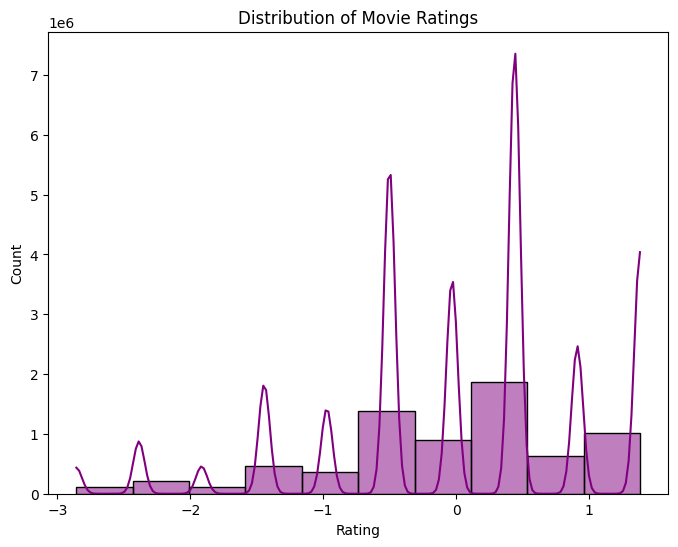

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot Rating distribution
plt.figure(figsize=(8,6))
sns.histplot(data['rating'], bins=10, kde=True, color='purple')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

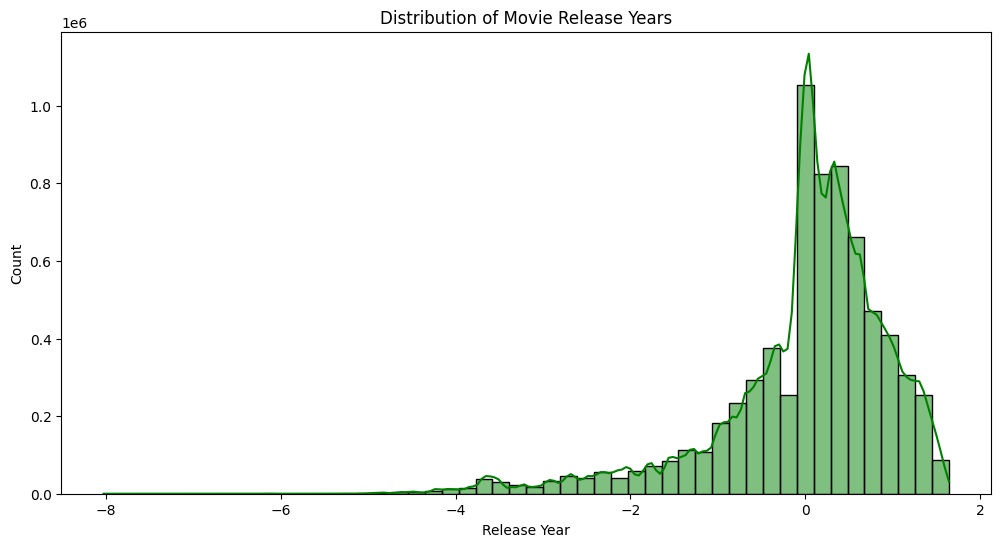

In [ ]:
#Plot year distribution
plt.figure(figsize=(12,6))
sns.histplot(data['year'], bins=50, kde=True, color='green')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

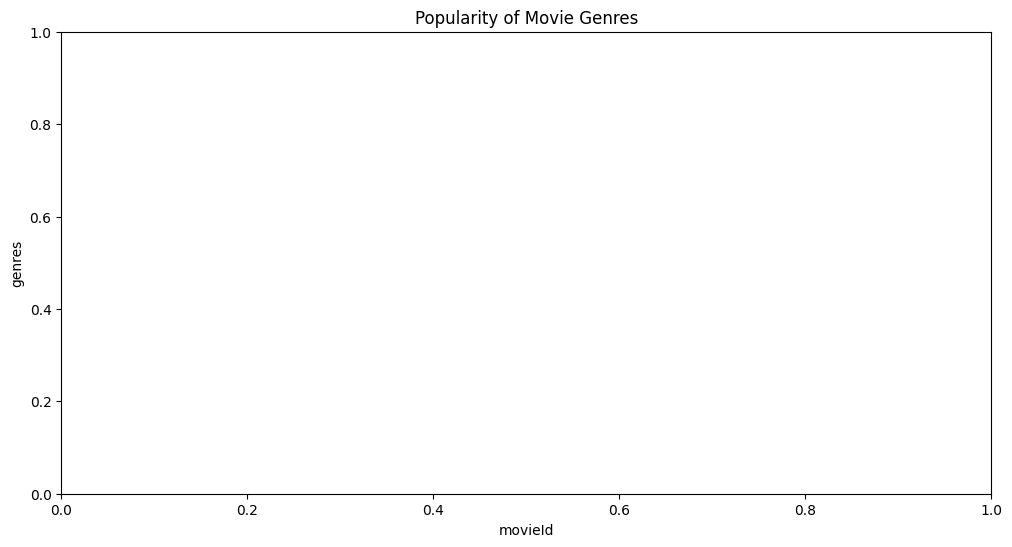

In [ ]:
ratings=pd.read_csv("ratings.csv")
# Plot top genres count
genre_columns = [col for col in data.columns if 'genres_' in col]
genre_counts = data[genre_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='rocket')
plt.title('Popularity of Movie Genres')
plt.xlabel('movieId')
plt.ylabel('genres')
plt.show()


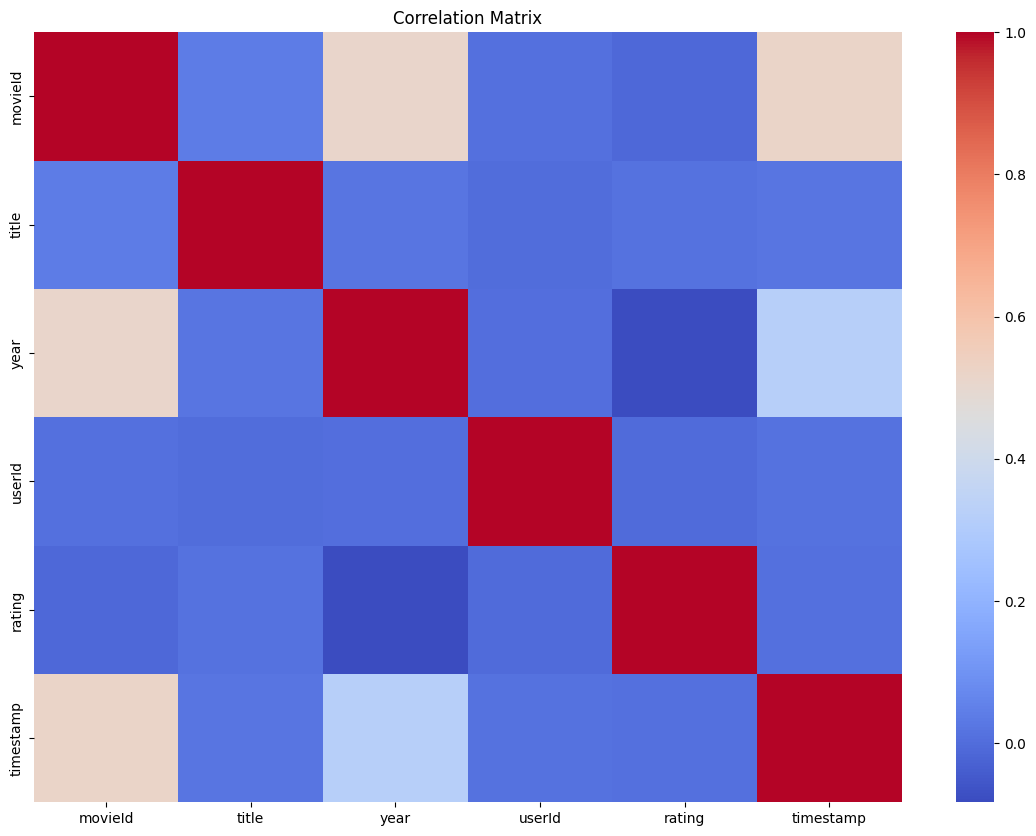

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

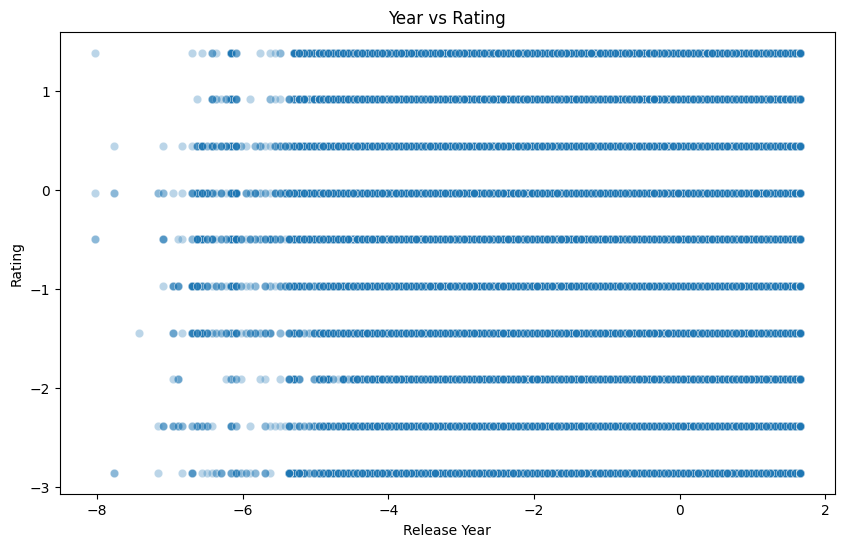

In [ ]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['year'], y=data['rating'], alpha=0.3)
plt.title('Year vs Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Create 'era' bins
bins = [1900, 1950, 1970, 1990, 2010, 2025]
labels = ['1900s-50s', '50s-70s', '70s-90s', '90s-2010', '2010s+']
data['year_bin'] = pd.cut(data['year'], bins=bins, labels=labels)
# One-hot encode era
data = pd.get_dummies(data, columns=['year_bin'])
data

,movieId,title,year,userId,rating,timestamp,year_bin_1900s-50s,year_bin_50s-70s,year_bin_70s-90s,year_bin_90s-2010,year_bin_2010s+
0,1,39203,0.044103,2,-0.030723,1141415820,False,False,False,False,False
1,1,39203,0.044103,3,0.440513,1439472215,False,False,False,False,False
2,1,39203,0.044103,4,-0.501959,1573944252,False,False,False,False,False
3,1,39203,0.044103,5,0.440513,858625949,False,False,False,False,False
4,1,39203,0.044103,8,0.440513,890492517,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7060014,209053,5414,1.178127,15152,-0.030723,1574007700,False,False,False,False,False
7060015,209055,40557,0.844591,15152,-0.030723,1574007770,False,False,False,False,False
7060016,209069,31812,0.511054,30779,-0.501959,1574034601,False,False,False,False,False
7060017,209103,39593,-0.222726,13737,0.440513,1574112239,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
movieId,0
title,0
year,3389
userId,0
rating,0
timestamp,0
year_bin_1900s-50s,0
year_bin_50s-70s,0
year_bin_70s-90s,0
year_bin_90s-2010,0


In [ ]:
data['year'] = data['year'].fillna(data['year'].mode()[0])
data.isnull().sum()

,0
movieId,0
title,0
year,0
userId,0
rating,0
timestamp,0
year_bin_1900s-50s,0
year_bin_50s-70s,0
year_bin_70s-90s,0
year_bin_90s-2010,0


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Example with 2 features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['year', 'rating']])

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Select numeric columns for PCA
X = data.select_dtypes(include=[np.number]).drop(columns=['userId', 'movieId'])
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA(n_components=0.95)
# Keep 95% variance
X_pca = pca.fit_transform(X_scaled)
print(f"PCA reduced to {X_pca.shape[1]} features.")

PCA reduced to 4 features.


In [ ]:
from sklearn.model_selection import train_test_split
# Features and Target
X = data.drop(columns=['userId', 'movieId', 'timestamp', 'rating'])  # Drop irreleva
from sklearn.model_selection import train_test_split
# Features and Target
X = data.drop(columns=['userId', 'movieId', 'timestamp', 'rating'])  # Drop irreleva
y = data['rating']  # Target variable
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added random_state

from sklearn.linear_model import LinearRegression
# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Predict
y_pred_lr = lr_model.predict(X_test)
print("y_pred_lr",y_pred_lr)
# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Predict
y_pred_lr = lr_model.predict(X_test)
print("y_pred_lr",y_pred_lr)

y_pred_lr [-0.0820474  -0.04085407 -0.09449898 ...  0.00476383 -0.02608172
  0.04758411]
y_pred_lr [-0.0820474  -0.04085407 -0.09449898 ...  0.00476383 -0.02608172
  0.04758411]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined from previous cells

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(random_state=42)  # Initialize with random_state for reproducibility
rf_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_rf = rf_model.predict(X_test)

# Evaluation for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Evaluation for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Evaluation for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")

Linear Regression - MAE: 0.7905, RMSE: 0.9955, R²: 0.0071


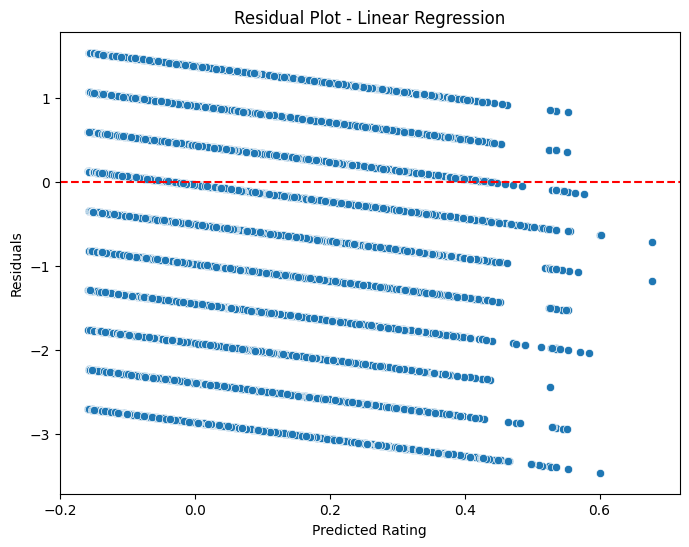

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Residuals
residuals = y_test - y_pred_lr
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot - Linear Regression')
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals')
plt.show()

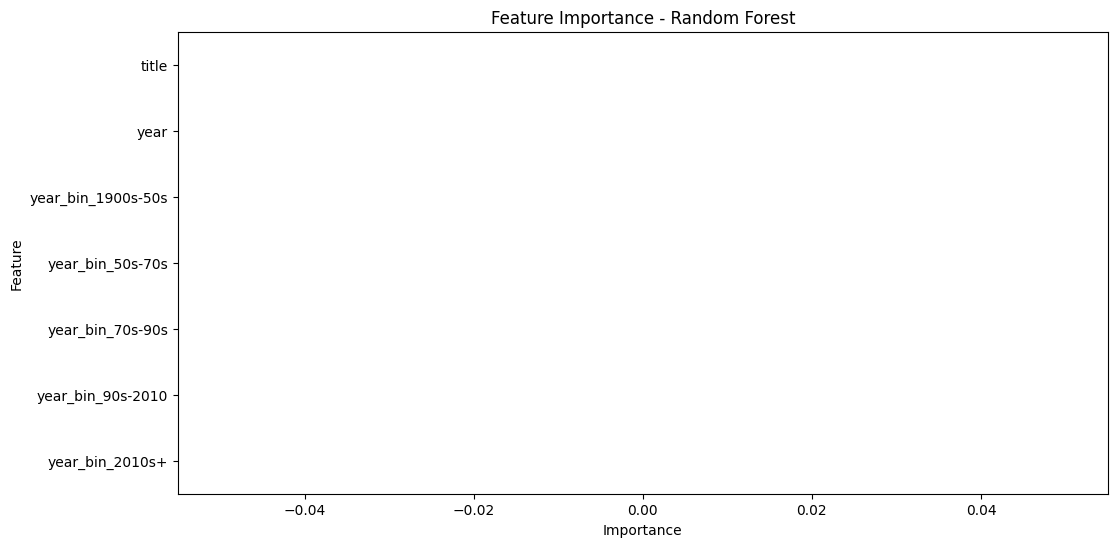

In [ ]:
# Get feature importance
importances = rf_model.feature_importances_
features = X.columns
# Create DataFrame
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

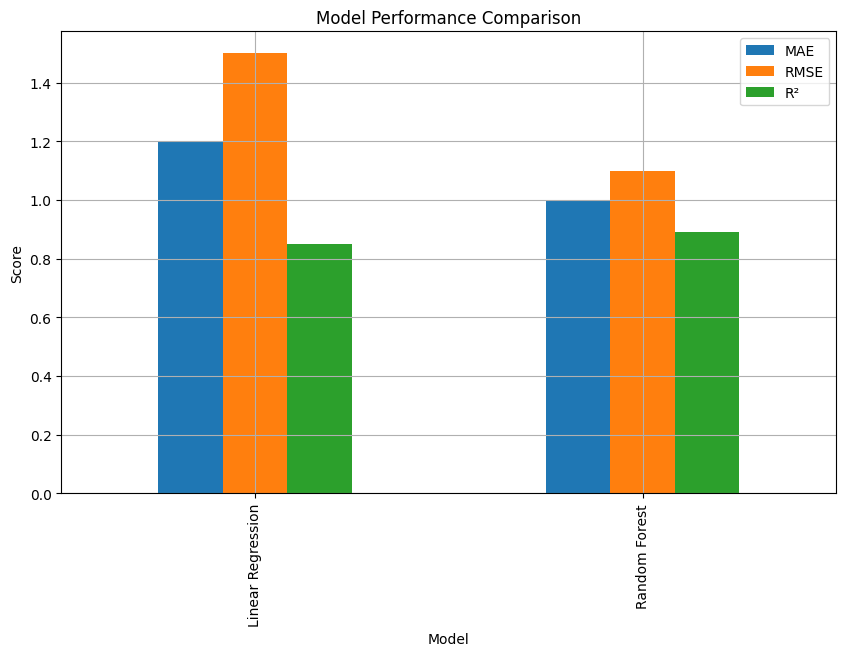

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Example definitions (replace with real ones)
mae_lr = 1.2
mae_rf = 1.0
rmse_lr = 1.5
rmse_rf = 1.1
r2_lr = 0.85
r2_rf = 0.89

# Create metrics DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R²': [r2_lr, r2_rf]
})

# Bar plot
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.grid(True)
plt.show()